In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [2]:
df = pd.read_csv('BTC-Daily.csv')

df = df.drop_duplicates()

df.head()


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [4]:
df.describe()


,unix,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,6.613247e+07,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


2014-11-28 to 2022-03-01
[2022 2021 2020 2019 2018 2017 2016 2015 2014]


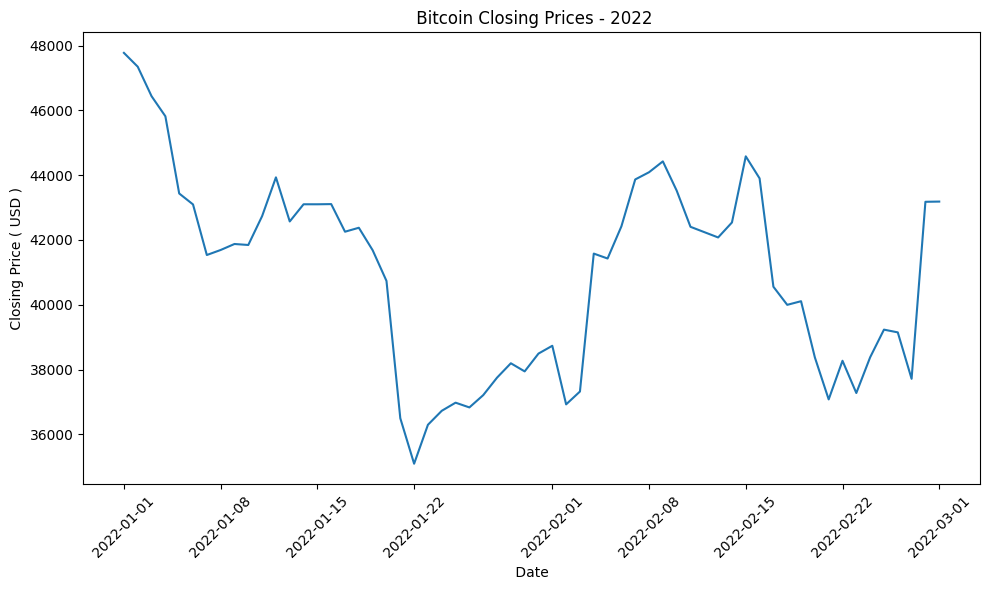

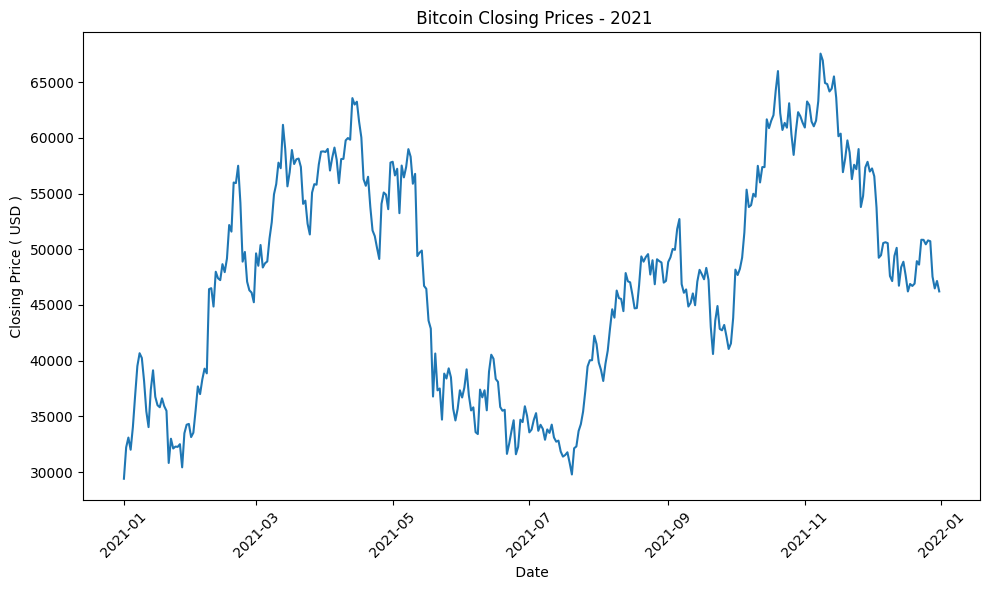

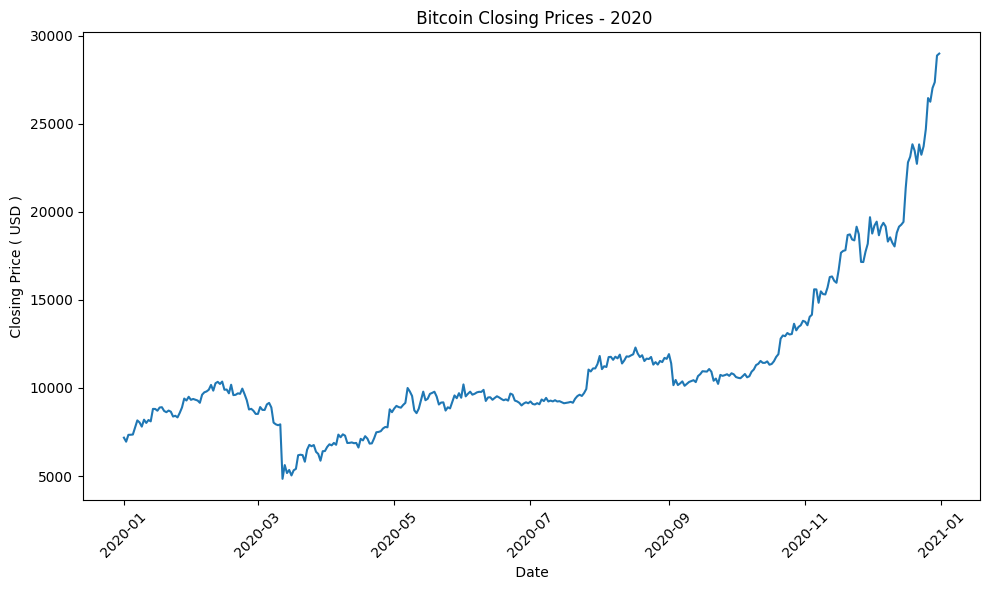

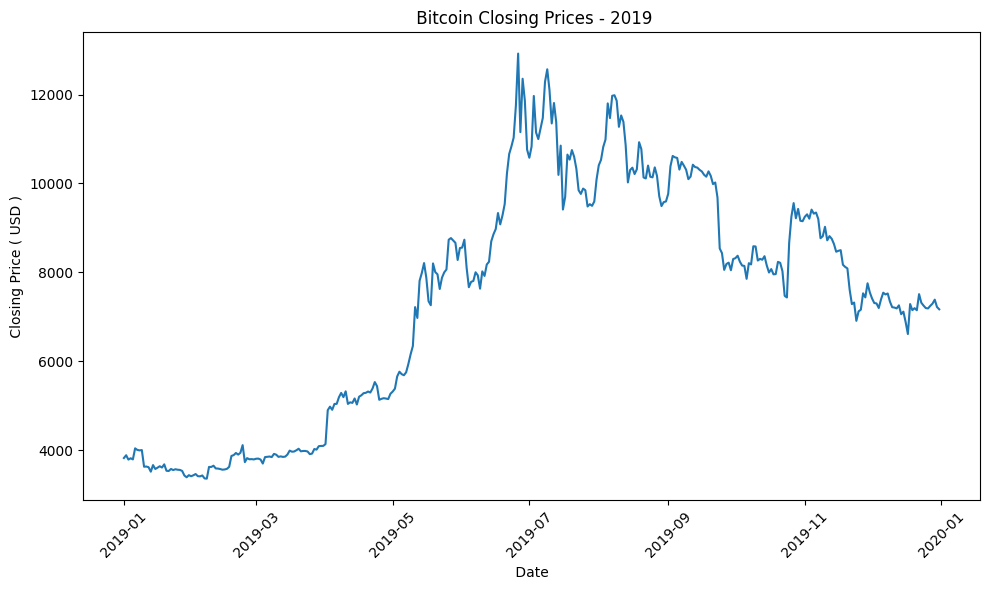

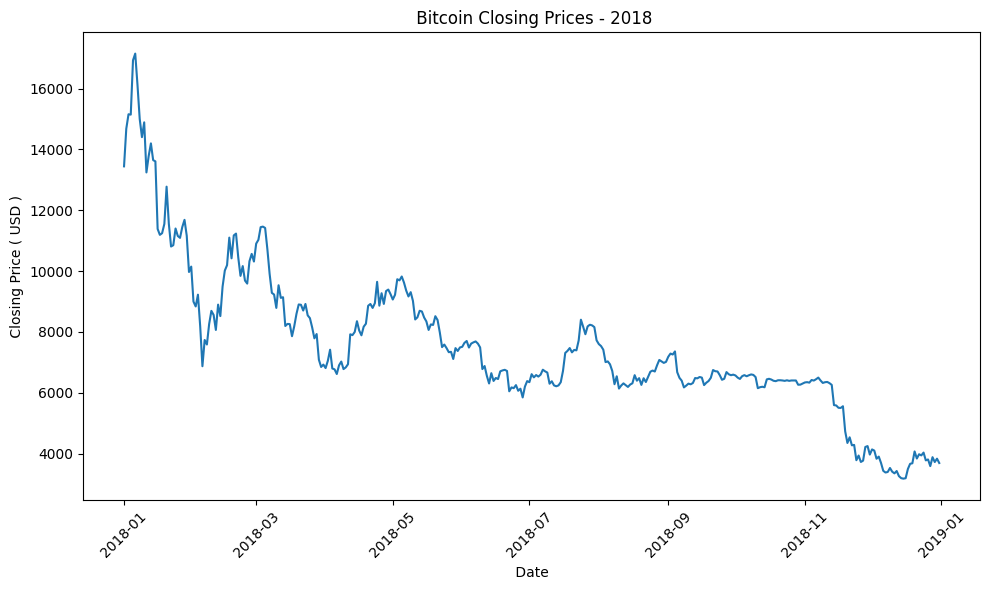

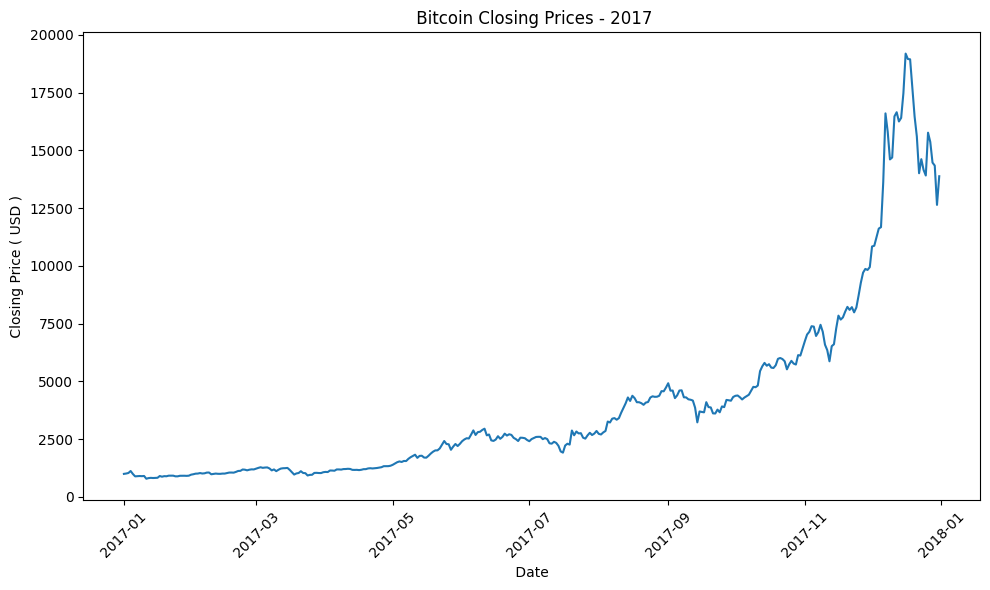

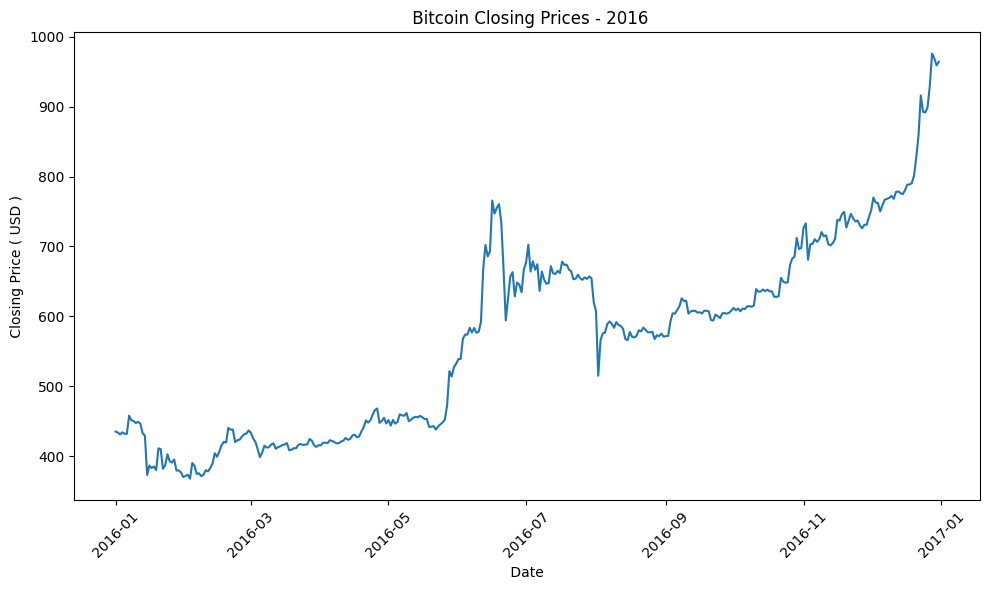

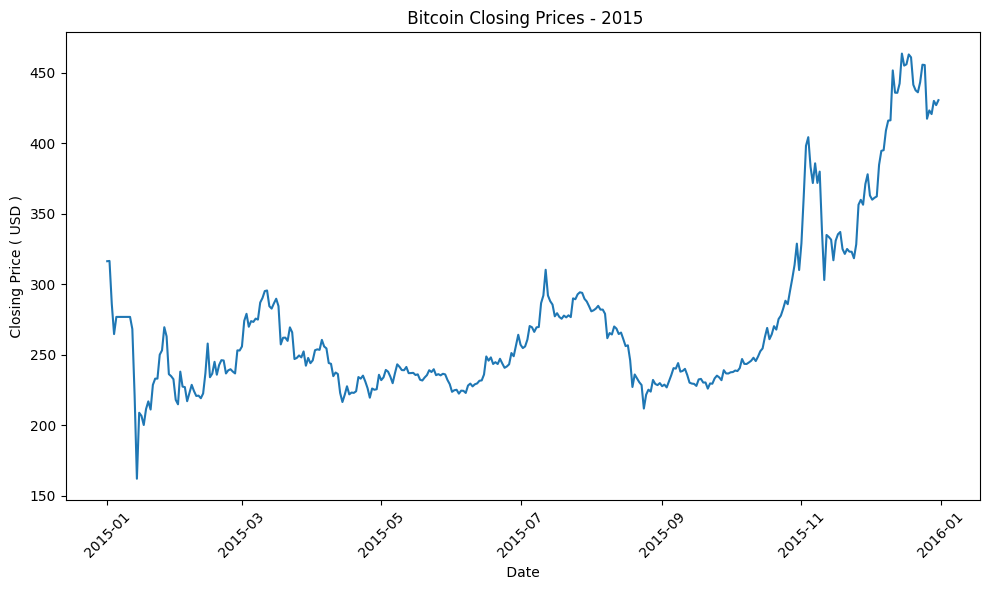

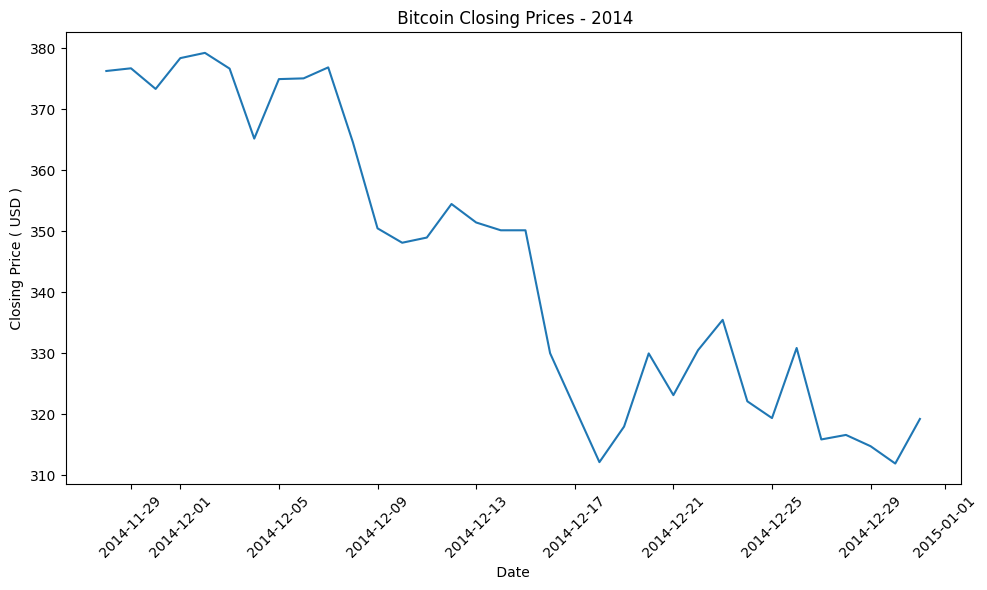

In [10]:
# Range of dates covered
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)

unique_years = df['date'].dt.year.unique()
print(unique_years)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

for year in unique_years:
    dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    year_month_day = pd.DataFrame({'date': dates})
    year_month_day['year'] = year_month_day['date'].dt.year
    year_month_day['month'] = year_month_day['date'].dt.month
    year_month_day['day'] = year_month_day['date'].dt.day

    merged_data = pd.merge(year_month_day,df, on=['year', 'month', 'day'], how='left')
    plt.figure( figsize =(10 , 6) )
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title( f' Bitcoin Closing Prices - { year }')
    plt.xlabel(' Date ')
    plt.ylabel(' Closing Price ( USD ) ')
    plt.xticks( rotation =45)
    plt.tight_layout ()
    plt.show()


In [30]:
def predict(X, w, b):
    return X.dot(w) + b

def compute_gradient(y_hat, y, x):
    loss = y_hat - y
    dw = x.T.dot(loss)/len(y)
    db = np.sum(loss)/len(y)
    cost = np.sum(loss**2)/(2*len(y))
    return dw, db, cost

def update_weight(w,b,lr,dw,db):
    w_new = w - lr*dw
    b_new = b - lr*db
    return (w_new, b_new)





In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df["Standardized_Close_Prices"] = scaler.fit_transform(df["close"].values.reshape(-1,1))
df["Standardized_Open_Prices"] = scaler.fit_transform(df["open"].values.reshape(-1,1))
df["Standardized_High_Prices"] = scaler.fit_transform(df["high"].values.reshape(-1,1))
df["Standardized_Low_Prices"] = scaler.fit_transform(df["low"].values.reshape(-1,1))

df.head()



,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,year,month,day,Standardized_Close_Prices,Standardized_Open_Prices,Standardized_High_Prices,Standardized_Low_Prices,NumericalDate
0,1646092800,2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06,2022,3,1,1.933444,1.937893,1.887415,2.029161,20220301000000
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08,2022,2,28,1.933045,1.599553,1.925034,1.665409,20220228000000
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07,2022,2,27,1.597274,1.687421,1.663971,1.636567,20220227000000
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07,2022,2,26,1.685357,1.693320,1.690505,1.737377,20220226000000
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07,2022,2,25,1.690577,1.639126,1.654474,1.700955,20220225000000


In [32]:
#Converting Date to numerical form

df['date_str'] = df['date'].dt.strftime('%Y%m%d%H%M%S')

# Convert the string date to a numerical value
df['NumericalDate'] = pd.to_numeric(df['date_str'])

# Drop the intermediate 'date_str' column if not needed
df.drop(columns=['date_str'], inplace=True)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae

X = df[["Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


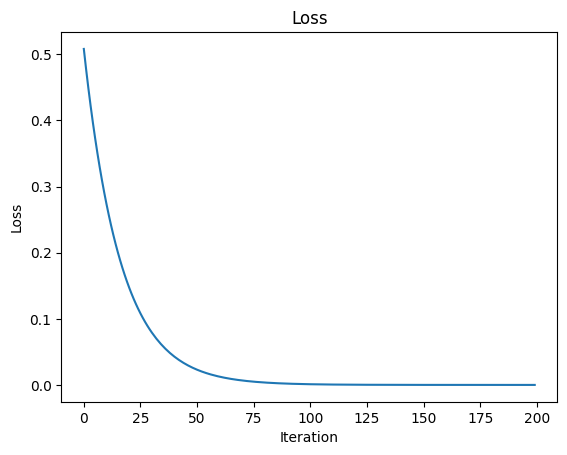

In [37]:
def linear_regression(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Initialize weights
    b = 0  # Initialize bias
    losses = []

    for _ in range(num_iterations):
        y_hat = predict(X, w, b)  # Make predictions
        dw, db, cost = compute_gradient(y_hat, y, X)  # Calculate gradients
        w, b = update_weight(w, b, learning_rate, dw, db)  # Update weights and bias
        losses.append(cost)


    return w, b, losses

w, b, loss_history = linear_regression(X_train.values, y_train.values, learning_rate=0.01, num_iterations=200)

plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()


In [39]:
from sklearn.metrics import r2_score

y_pred = predict(X_test.values, w, b)

rmse = np.sqrt(np.mean((y_test - y_pred)**2))
mae = np.mean(np.abs(y_test - y_pred))
mape = np.mean(np.abs((y_test - y_pred)/y_test)) * 100

y_train_pred = predict ( X_train , w , b )
train_accuracy = r2_score ( y_train , y_train_pred )

test_accuracy = r2_score( y_test , y_pred )

print("Root Mean Square Error(RMSE):", round(rmse, 4)) 
print("Mean Absolute Error(MAE):", round(mae, 4))
print("Training Accuracy:", round(train_accuracy, 4))
print("Test Accuracy:", round(test_accuracy, 4))



Root Mean Square Error(RMSE): 0.0293
Mean Absolute Error(MAE): 0.0138
Training Accuracy: 0.9989
Test Accuracy: 0.9991
